In [1]:
import util
import sqlite3
import numpy as np
from ira import Agent, HouseKeeping, Loader
from datetime import timedelta, datetime
from pprint import pprint
from time import sleep
from tqdm import tqdm


Bad key "text.kerning_factor" on line 4 in
C:\Users\KevinChng\Anaconda3\envs\kevin2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [8]:
loader = Loader()

In [9]:
loader.tn_est

'nus_establishments'

In [11]:
loader.load_from_table(loader.tn_est, 'db.sqlite3', username='*')

TypeError: load_from_table() takes 2 positional arguments but 3 were given

In [23]:
# purge rsv and qry tables 
qry = ('qry', ['id INTEGER PRIMARY KEY', 'session', 'timestamp', 'patron', 'establishment', 'n_person', 'time_in', 'time_out', 'intent', 'step', 'action', 'selection'])
rsv = ('rsv', ['id INTEGER PRIMARY KEY', 'session', 'timestamp', 'patron', 'establishment', 'n_person', 'time_in', 'time_out', 'intent', 'status', 'loc'])
conn = sqlite3.connect('dummy.db')
curs = conn.cursor()
for tn, clm in [qry, rsv]:
    curs.execute(f"DROP TABLE dummy_{tn}")
    curs.execute(f"CREATE TABLE dummy_{tn} ({', '.join(clm)})")
conn.commit()
conn.close()

In [2]:
conn = sqlite3.connect('dummy.db')
conn.cursor().execute(f"UPDATE dummy_rsv SET status='on-hold'")
conn.commit()
conn.close()

In [19]:
# ballot simulation
session = '000'
intent = 'NewReservation'
establishment = 'cruzbrown2048'
n_reservation = 200
in_advance_day = 2

loader = Loader()
setting = loader.load_from_table(loader.tn_est, username=establishment).iloc[0]
opening, closing, duration = setting['open_time'], setting['close_time'], int(setting['default_duration'])
opening, closing = datetime.strptime(opening, '%H%M'), datetime.strptime(closing, '%H%M')
n_slot = (closing - opening).seconds // (duration * 60)
now = datetime.now()
start = datetime(year=now.year, month=now.month, day=now.day+in_advance_day, hour=opening.hour, minute=opening.minute, second=0)
ctr = 0
# pbar = tqdm(total=n_reservation)
while ctr < n_reservation:
    a, b = np.random.randint(1, n_slot), np.random.randint(1, 9)
    if a + b > n_slot:
        continue
    a = start + timedelta(seconds=duration*60*a)
    b = a + timedelta(seconds=duration*60*b)
    a, b = datetime.strftime(a, '%y/%m/%d_%H:%M'), datetime.strftime(b, '%y/%m/%d_%H:%M')
    Agent(session, intent, str(ctr), establishment, time_in=a, time_out=b, n_person=str(np.random.randint(1, 6))).check_rules()
    sleep(0.001)
    response = Agent(session, intent, str(ctr), establishment, selection=a).check_rules()
    sleep(0.001)
    if response[0] == '-1':
        ctr += 1
        # pbar.update(1)

 50%|█████     | 501/1000 [00:00<00:00, 618.26it/s]
Convergence at or above 95% after 502 generations
Last generation: 
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]]

Fitness of the last generation: 
[2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 2 2 2]

The optimized parameters for the given inputs are: 
[1]

Accepted requests: [0] 



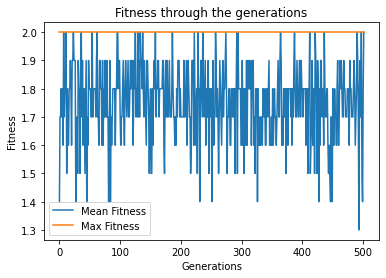

(502, 20)

Threshold outlook:
1 	request 0,	accepted 0
2 	request 0,	accepted 0
3 	request 2,	accepted 2
4 	request 0,	accepted 0
5 	request 0,	accepted 0
6 	request 0,	accepted 0
7 	request 0,	accepted 0
8 	request 0,	accepted 0
9 	request 0,	accepted 0
10 	request 0,	accepted 0
11 	request 0,	accepted 0
12 	request 0,	accepted 0
13 	request 0,	accepted 0
14 	request 0,	accepted 0
15 	request 0,	accepted 0
16 	request 0,	accepted 0
17 	request 0,	accepted 0
18 	request 0,	accepted 0
19 	request 0,	accepted 0
20 	request 0,	accepted 0
21 	request 0,	accepted 0
22 	request 0,	accepted 0
23 	request 0,	accepted 0
24 	request 0,	accepted 0
25 	request 0,	accepted 0
26 	request 0,	accepted 0
27 	request 0,	accepted 0
28 	request 0,	accepted 0
29 	request 0,	accepted 0
30 	request 0,	accepted 0
31 	request 0,	accepted 0
32 	request 0,	accepted 0
33 	request 0,	accepted 0
34 	request 0,	accepted 0
35 	request 0,	accepted 0
36 	request 0,	accepted 0
37 	request 0,	accepted 0
38 	request 0,	ac

In [38]:
HouseKeeping().genetic_algorithm_check()

In [24]:
# ballot new 1
session = '000'
intent = 'NewReservation'
patron = 'veronicarodriguez750602'
establishment = 'cruzbrown2048'

In [26]:
time_in = '20/10/28_12:00'
n_person = '2'
# customer request with [time_in] and [n_person] information
response = Agent(session, intent, patron, establishment, time_in=time_in, n_person=n_person).check_rules()
print(response[1])

The time frame that falls within your preferences is Wednesday 28 October 2020 at 12:00 to 12:15. Please confirm if it's okay for you


In [27]:
selection = '20/10/28_12:00'
# customer request with [selection] information
response = Agent(session, intent, patron, establishment, selection=selection).check_rules()
print(response[1])

Your request for 2 person(s) on Wednesday 28 October 2020 at 12:00 to 12:15 is now on-hold. Please status check after cufoff time 23:00


In [28]:
# ballot new 2
session = '000'
intent = 'NewReservation'
patron = 'veronicarodriguez750602'
establishment = 'cruzbrown2048'

In [29]:
time_in = '20/10/29_12:05'
time_out = '20/10/29_13:20'
n_person = '5'
# customer request with [time_in], [time_out] and [n_person] information
response = Agent(session, intent, patron, establishment, time_in=time_in, time_out=time_out, n_person=n_person).check_rules()
print(response[1])

The time frame that falls within your preferences is Thursday 29 October 2020 at 12:15 to 13:30. Please confirm if it's okay for you


In [30]:
selection = '20/10/29_12:15'
# customer request with [selection] information
response = Agent(session, intent, patron, establishment, selection=selection).check_rules()
print(response[1])

Your request for 5 person(s) on Thursday 29 October 2020 at 12:15 to 13:30 is now on-hold. Please status check after cufoff time 23:00


In [31]:
# ballot change
session = '000'
intent = 'ChangeReservation'
patron = 'veronicarodriguez750602'
establishment = 'cruzbrown2048'

In [32]:
# customer request with NO information
response = Agent(session, intent, patron, establishment).check_rules()
print(response[1])

I am afraid your reservation can only be cancelled


In [33]:
# ballot cancel
session = '000'
intent = 'CancelReservation'
patron = 'veronicarodriguez750602'
establishment = 'cruzbrown2048'

In [34]:
# customer request with NO information
response = Agent(session, intent, patron, establishment).check_rules()
print(response[1])

Please choose from the upcoming reservation slot(s): 
(1) Thursday 29 October 2020 at 12:15
(2) Wednesday 28 October 2020 at 12:00


In [35]:
selection = '20/10/29_12:15'
# customer chooses [selection] from existing to cancel
response = Agent(session, intent, patron, establishment, selection=selection).check_rules()
print(response[1])

The reservation has been successfully cancelled


In [ ]:
# purge rsv and qry tables 
qry = ('qry', ['id INTEGER PRIMARY KEY', 'session', 'timestamp', 'patron', 'establishment', 'n_person', 'time_in', 'time_out', 'intent', 'step', 'action', 'selection'])
rsv = ('rsv', ['id INTEGER PRIMARY KEY', 'session', 'timestamp', 'patron', 'establishment', 'n_person', 'time_in', 'time_out', 'intent', 'status', 'loc'])
conn = sqlite3.connect('dummy.db')
curs = conn.cursor()
for tn, clm in [qry, rsv]:
    curs.execute(f"DROP TABLE dummy_{tn}")
    curs.execute(f"CREATE TABLE dummy_{tn} ({', '.join(clm)})")
conn.commit()
conn.close()

In [5]:
# new
session = '001'
intent = 'NewReservation'
patron = 'veronicarodriguez750602'
establishment = 'mcdonaldbrownandmurphy8492'

In [6]:
time_in = '20/10/28_12:00'
n_person = '2'
# customer request with [time_in] and [n_person] information
response = Agent(session, intent, patron, establishment, time_in=time_in, n_person=n_person).check_rules()
print(response[1])

Available time slot(s): 
(1) Wednesday 28 October 2020 at 12:00
(2) Wednesday 28 October 2020 at 11:30
(3) Wednesday 28 October 2020 at 12:30
(4) Tuesday 27 October 2020 at 12:00
(5) Thursday 29 October 2020 at 12:00


In [7]:
selection = '20/10/28_12:00'
# customer chooses [selection]
response = Agent(session, intent, patron, establishment, selection=selection).check_rules()
print(response[1])

Reservation for 2 on Wednesday 28 October 2020 at 12:00 has been confirmed


In [8]:
# change
session = '002'
intent = 'ChangeReservation'
patron = 'veronicarodriguez750602'
establishment = 'mcdonaldbrownandmurphy8492'

In [9]:
# customer request with NO information
response = Agent(session, intent, patron, establishment).check_rules()
print(response[1])

Please choose from the upcoming reservation slot(s): 
(1) Wednesday 28 October 2020 at 12:00


In [10]:
selection1 = '20/10/28_12:00'
# customer chooses [selection] from existing to change
response = Agent(session, intent, patron, establishment, selection=selection1).check_rules()
print(response[1])

How many persons would need to be admitted at which date and time, please?


In [11]:
time_in = '20/10/28_13:00'
n_person = '5'
# customer request with NEW [time_in] and [n_person] information
response = Agent(session, intent, patron, establishment, time_in=time_in, n_person=n_person).check_rules()
print(response[1])

Available time slot(s): 
(1) Wednesday 28 October 2020 at 13:00
(2) Wednesday 28 October 2020 at 12:30
(3) Wednesday 28 October 2020 at 13:30
(4) Tuesday 27 October 2020 at 13:00
(5) Thursday 29 October 2020 at 13:00


In [12]:
selection2 = '20/10/28_13:00'
# customer chooses [selection] from slot offer
response = Agent(session, intent, patron, establishment, selection=selection2).check_rules()
print(response[1])

Previous reservation on Wednesday 28 October 2020 at 12:00 has been successfully cancelled, and new reservation for 5 on Wednesday 28 October 2020 at 13:00 has been confirmed


In [13]:
# cancel
session = '003'
intent = 'CancelReservation'
patron = 'veronicarodriguez750602'
establishment = 'mcdonaldbrownandmurphy8492'

In [14]:
# customer request with NO information
response = Agent(session, intent, patron, establishment).check_rules()
print(response[1])

Please choose from the upcoming reservation slot(s): 
(1) Wednesday 28 October 2020 at 13:00


In [15]:
selection = '20/10/28_13:00'
# customer chooses [selection] from existing to cancel
response = Agent(session, intent, patron, establishment, selection=selection).check_rules()
print(response[1])

The reservation has been successfully cancelled


In [6]:
# tables

In [36]:
util.load_table('dummy_qry', 'dummy.db').tail(10)

,id,session,timestamp,patron,establishment,n_person,time_in,time_out,intent,step,action,selection
0,1,000|1603601957|success,20/10/25_12:58:54.087088,veronicarodriguez750602,cruzbrown2048,2,20/10/28_11:00,20/10/28_11:15,NewReservation,5,OutsideOperatingHours,None
1,2,000|1603601957|success,20/10/25_12:58:59.169112,veronicarodriguez750602,cruzbrown2048,2,20/10/28_12:00,20/10/28_12:15,NewReservation,10,InformBallotSlot,None
2,3,000|1603601957|success,20/10/25_12:59:16.809024,veronicarodriguez750602,cruzbrown2048,2,20/10/28_12:00,20/10/28_12:15,NewReservation,16,OnHoldReservation,20/10/28_12:00
3,4,000|1603601975|success,20/10/25_12:59:29.746502,veronicarodriguez750602,cruzbrown2048,5,20/10/29_12:05,20/10/29_13:20,NewReservation,10,InformBallotSlot,None
4,5,000|1603601975|success,20/10/25_12:59:34.692804,veronicarodriguez750602,cruzbrown2048,5,20/10/29_12:05,20/10/29_12:20,NewReservation,16,OnHoldReservation,20/10/29_12:15
5,6,000|1603601986|success,20/10/25_12:59:45.983353,veronicarodriguez750602,cruzbrown2048,None,None,None,ChangeReservation,2,UnableToChange,None
6,7,000|1603602001|success,20/10/25_12:59:52.218052,veronicarodriguez750602,cruzbrown2048,None,None,None,CancelReservation,2,ListUpcoming,None
7,8,000|1603602001|success,20/10/25_13:00:00.500249,veronicarodriguez750602,cruzbrown2048,None,None,None,CancelReservation,3,CancelSuccess,20/10/29_12:15


In [39]:
util.load_table('dummy_rsv', 'dummy.db')

,id,session,timestamp,patron,establishment,n_person,time_in,time_out,intent,status,loc
0,1,000,20/10/25_12:59:16.809024,veronicarodriguez750602,cruzbrown2048,2,20/10/28_12:00,20/10/28_12:15,NewReservation,confirmed,None
1,2,000,20/10/25_12:59:34.692804,veronicarodriguez750602,cruzbrown2048,5,20/10/29_12:15,20/10/29_13:30,NewReservation,cancelled,None


In [4]:
util.load_table('dummy_est', 'dummy.db')

,index,is_active,name,username,password,email,phone,sublocs,max_cap,open_days,open_time,close_time,max_group_size,default_duration,days_in_advance,report_period,id
0,0,1,Cruz-Brown,cruzbrown2048,WDTXbKELwzz,cruzbrown2048@test.com.sg,67197325,-,53,1234567,1130,2300,5,15,2,14,0
1,1,1,"Mcdonald, Brown and Murphy",mcdonaldbrownandmurphy8492,bplWWibgSzhB,mcdonaldbrownandmurphy8492@test.com.sg,62541452,"{""S0"":6,""S1"":10,""S2"":1,""S3"":10,""S4"":8,""S5"":8,""...",110,12345,0900,1930,5,30,2,7,1
2,2,1,"Ortiz, Garcia and Haynes",ortizgarciaandhaynes3507,lXcgwYdrvni,ortizgarciaandhaynes3507@test.com.sg,69124118,-,74,123456,0930,1500,5,45,2,14,2
3,3,1,"Sampson, Lewis and Murillo",sampsonlewisandmurillo8285,AnnGsXscPSOD,sampsonlewisandmurillo8285@test.com.sg,64055602,"{""S0"":4,""S1"":3,""S2"":8,""S3"":7,""S4"":1,""S5"":3,""S6...",28,1234567,1230,2130,5,15,2,21,3
4,4,1,Perez Group,perezgroup9924,xaWdbGKKeBZ,perezgroup9924@test.com.sg,68071691,"{""S0"":7,""S1"":10,""S2"":1,""S3"":8}",26,123456,0930,1930,5,30,1,21,4
5,5,1,Bruce-Marks,brucemarks9051,VzsWhifKxnhM,brucemarks9051@test.com.sg,62870445,"{""S0"":2,""S1"":5,""S2"":10,""S3"":1,""S4"":4,""S5"":10,""...",73,123456,1100,2230,5,45,2,7,5
6,6,1,Stout-Thomas,stoutthomas8195,IHnxXiSSixJ,stoutthomas8195@test.com.sg,63720181,"{""S0"":4,""S1"":1,""S2"":3,""S3"":10,""S4"":10,""S5"":7,""...",38,1234567,0830,2330,5,75,1,21,6
7,7,1,Mann-Freeman,mannfreeman8955,AiISCaWtI,mannfreeman8955@test.com.sg,65971927,"{""S0"":2,""S1"":2,""S2"":9}",13,1234567,0600,1730,5,45,1,14,7
8,8,1,Buck PLC,buckplc1981,wWDmeZevwZa,buckplc1981@test.com.sg,66722294,"{""S0"":2,""S1"":8,""S2"":5,""S3"":2,""S4"":5,""S5"":3,""S6...",61,12345,0630,1430,5,30,1,21,8
9,9,1,Lewis PLC,lewisplc6489,cqmdSSDMwiL,lewisplc6489@test.com.sg,60237540,"{""S0"":2,""S1"":2,""S2"":1,""S3"":10,""S4"":3,""S5"":6,""S...",34,1234567,0700,1500,5,30,2,7,9


In [11]:
util.load_table('dummy_pat', 'dummy.db')

,index,is_active,name,dob,username,password,email,phone,id
0,0,1,Karen Todd,08/08/13,karentodd080813,kQygJjjblw,karen.todd@test.com.sg,85319943,0
1,1,1,Veronica Rodriguez,75/06/02,veronicarodriguez750602,PXpGxAOB,veronica.rodriguez@test.com.sg,88742016,1
2,2,1,Joshua Boyd,58/01/17,joshuaboyd580117,muIhgEVgj,joshua.boyd@test.com.sg,95423509,2
3,3,1,Stanley Hamilton,08/10/29,stanleyhamilton081029,qbfHZLnO,stanley.hamilton@test.com.sg,80946989,3
4,4,1,Melissa Campbell,14/02/10,melissacampbell140210,XBUuBzPLu,melissa.campbell@test.com.sg,89831388,4
...,...,...,...,...,...,...,...,...,...
495,495,1,Joanne Dorsey,23/02/18,joannedorsey230218,lXoRVddK,joanne.dorsey@test.com.sg,97807442,495
496,496,1,Kelly Anderson,39/07/17,kellyanderson390717,iNSFrQpt,kelly.anderson@test.com.sg,85326997,496
497,497,1,Jonathan Parker,01/02/05,jonathanparker010205,BVGqlQxrrn,jonathan.parker@test.com.sg,97885874,497
498,498,1,Michael Wade,19/11/28,michaelwade191128,lOIIfMflPrVG,michael.wade@test.com.sg,99371892,498


In [2]:
import util
import sqlite3

table = 'est'
n_row = 10

func = {'rsv': util.create_dummy_appointments, 
        'est': util.create_dummy_businesses, }

try:
    conn = sqlite3.connect('dummy.db')
    conn.cursor().execute(f"DROP TABLE dummy_{table}")
    conn.commit()
    conn.close()
except sqlite3.OperationalError:
    pass
df = func[table](n_row)
util.df_to_table(df, f"dummy_{table}", 'dummy.db')

 51%|█████     | 510/1000 [00:11<00:11, 42.90it/s]
Convergence at or above 95% after 511 generations
Last generation: 
[[0 1 1 ... 0 1 1]
 [0 1 1 ... 0 1 1]
 [0 1 1 ... 0 1 1]
 ...
 [0 1 1 ... 0 1 1]
 [0 1 1 ... 0 1 1]
 [0 1 1 ... 0 1 1]]

Fitness of the last generation: 
[1730 1730 1730 1730 1730 1730 1730 1730 1730 1730 1730 1730 1720 1730
 1730 1730 1730 1714 1730 1730]

The optimized parameters for the given inputs are: 
[0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1
 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1]

Accepted requests: [  1   2   3   6   7   8   9  10  11  12  13  14  16  17  18  19  21  22
  23  24  25  26  28  29  30  31  32  34  35  37  38  40  42  43  44  4

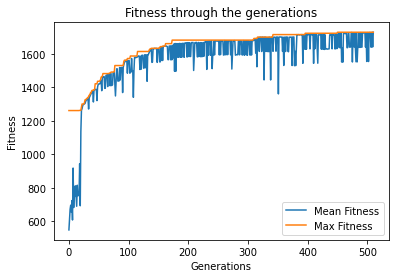

(511, 20)

Threshold outlook:
Request 16,	accepted 16
Request 26,	accepted 26
Request 35,	accepted 35
Request 48,	accepted 48
Request 53,	accepted 45
Request 50,	accepted 42
Request 54,	accepted 46
Request 48,	accepted 40
Request 51,	accepted 43
Request 64,	accepted 50
Request 66,	accepted 50
Request 59,	accepted 46
Request 61,	accepted 48
Request 44,	accepted 36
Request 40,	accepted 32
Request 48,	accepted 40
Request 45,	accepted 40
Request 50,	accepted 45
Request 51,	accepted 41
Request 60,	accepted 50
Request 61,	accepted 49
Request 64,	accepted 49
Request 63,	accepted 43
Request 67,	accepted 43
Request 62,	accepted 37
Request 81,	accepted 50
Request 79,	accepted 45
Request 79,	accepted 48
Request 84,	accepted 50
Request 80,	accepted 49
Request 78,	accepted 38
Request 77,	accepted 39
Request 74,	accepted 39
Request 82,	accepted 47
Request 79,	accepted 50
Request 75,	accepted 45
Request 73,	accepted 47
Request 78,	accepted 49
Request 65,	accepted 44
Request 73,	accepted 50

91% reque

array([  1,   2,   3,   6,   7,   8,   9,  10,  11,  12,  13,  14,  16,
        17,  18,  19,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  34,  35,  37,  38,  40,  42,  43,  44,  45,  46,  48,  49,
        50,  51,  52,  53,  54,  56,  57,  58,  59,  60,  61,  62,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  74,  75,  76,  78,  79,
        80,  81,  82,  83,  84,  85,  87,  88,  90,  91,  92,  93,  94,
        96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       110, 114, 115, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127,
       128, 130, 132, 133, 134, 136, 137, 140, 141, 142, 143, 145, 146,
       147, 148, 151, 153, 154, 155, 156, 157, 158, 160, 162, 166, 167,
       168, 170, 172, 173, 174, 175, 176, 177, 178, 179, 181, 182, 183,
       184, 185, 186, 187, 190, 191, 192, 194, 195, 198, 199], dtype=int64)

In [5]:
import numpy as np
from genetic_algorithm import GA


# number of requests
n_req = 200
# number of slots in a day
n_slot = 40
# maximum slots customers can choose as on block
max_block = 8
# maximum guests per block
max_party = 5

# allreqs: each request daily slotwise created randomly, shape is (n_req, n_slot)
# e.g. allreqs[0]
# array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
#        0., 0., 0., 0., 0., 0., 0., 0., 4., 4., 4., 4., 4., 4., 4., 0., 0.,
#        0., 0., 0., 0., 0., 0.])
reqs = [[np.random.randint(0, n_slot + 1), np.random.randint(1, max_block + 1), np.random.randint(1, max_party + 1)] for _ in range(n_req)]
limit = max([start + length for start, length, _ in reqs])
reqs = np.array([[qty if start <= i < start + length else 0 for i in range(limit)] for start, length, qty in reqs])
zeroes = np.zeros((n_req, n_slot))
zeroes[:, :n_slot] = reqs[:, :n_slot]

allreqs = zeroes
n_generation = 1000
thresh = 50

ga = GA(allreqs, n_generation, thresh)
ga.execute()